<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-2-Applied-Modeling/blob/master/Module3/Aaron_Huizenga_LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

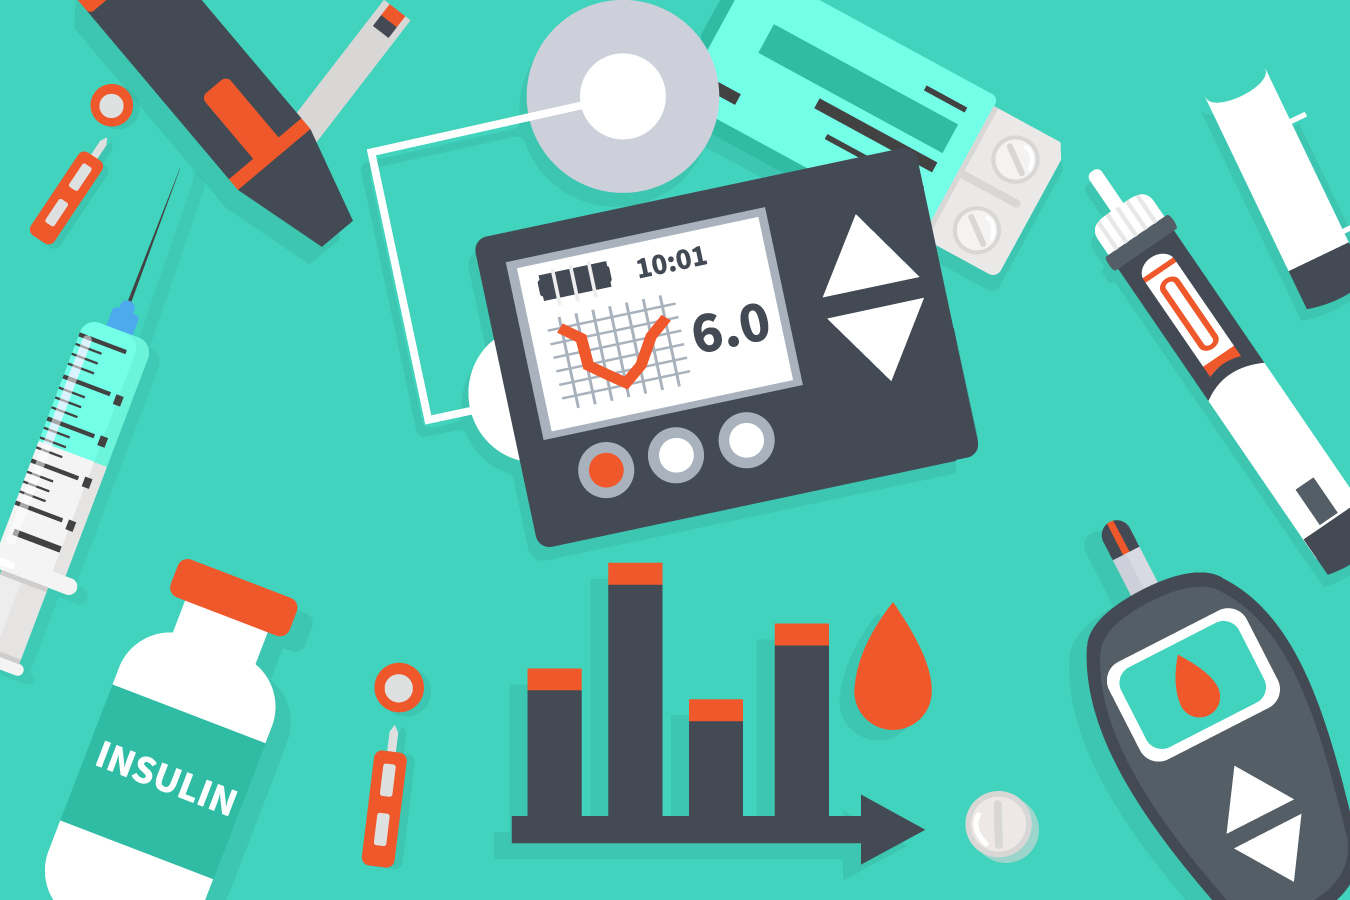

In [0]:
from IPython.display import display, Image
png = 'https://khn.org/wp-content/uploads/sites/2/2018/07/diabetes_1350x900.jpg'
example = Image(png, width=750)
display(example)

## I am going to be working with my own original data set.

In [0]:
# I need to be able to read in the data.

%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [0]:
!pip install -q matplotlib-venn
!pip install squarify

# 1. Import Libraries and load the dataset.

In [0]:
%matplotlib inline
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import itertools
import category_encoders as ce
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
from google.colab import files
files.upload()

Saving diabetic.csv to diabetic (15).csv


{'diabetic.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [0]:
# This function will allow me to read the data.

pima = pd.read_csv('diabetic.csv')
pima.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

In [0]:
# I want to check for any missing values. 

pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* Initial observtion shows that there are no missing values. Based on observation, every row and column is a variable - Thus concluding that the dataset is tidy.

In [0]:
# Even though it appears tidy, there can be an actual numeric column determined by
# Pandas to be a string. However; in this particular set it doesn't appear to be
# true.

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# 2. Run Train/Test split.

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.766


In [0]:
y_train.value_counts(normalize=True) 

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [0]:
pipeline

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(b...ap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                       

In [0]:
dir(pipeline)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_inverse_transform',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_required_parameters',
 '_set_params',
 '_transform',
 '_validate_names',
 '_validate_steps',
 'classes_',
 'decision_function',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'memory',
 'named_steps',
 'predict',
 'p

# 3. Explore target variable and check for class inbalance.

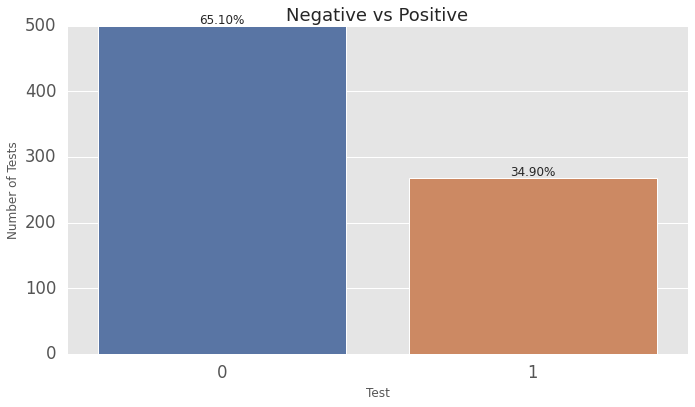

In [0]:
# function for countplot
def bplot_perc(col, data, title, xlabel, ylabel, ax=None, hue=None):
    sns.set(font_scale=1.5)
    sns.countplot(col, data=data, ax=ax, hue=hue)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    total = len(pima)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 4, '{:1.2f}%'.format((height/total)*100), ha="center", size=12) 
    plt.tight_layout()   
    plt.show()

# plot for target variable
f,ax=plt.subplots(figsize = (10,6))
bplot_perc(col='Outcome', data=pima, title='Negative vs Positive', xlabel='Test', ylabel='Number of Tests', ax=ax)

##### BLUE IS NEGATIVE AND ORANGE IS POSITIVE


In [0]:
pf.ProfileReport(data)

# 4. Individual features analysis.

  * There are two types of features - Categorical and Continuous.

### Categorical Features
  * A cat variable limits the finite number of categories. The can either be labels or discrete numerical values. Of which, both can be further divided into nominal and ordinal data. 

### Continuous Features
  * A cont variable can take an infinite set of numberical values. For instance; in this DS the continuous features would be pregnant, glucose, blood pressure, skin-thickness, insulin, bmi, dpf, and age.

In [0]:
# I want to select features with less than 15 unique elements as categories.

pima.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [0]:
# The idea here is whether an individual has ever been pregnant, as well as, the
# number of pregnancies that have had an impact on the target ('Outcome').

pd.crosstab(pima['Outcome'], pima['Pregnancies']).style.background_gradient(cmap='Blues_r')

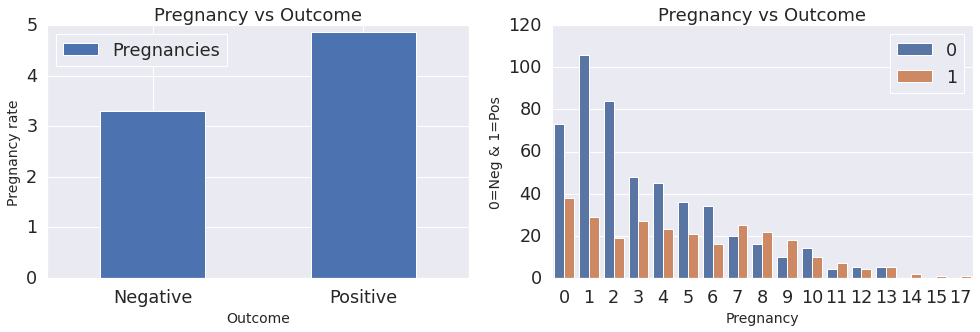

In [0]:
# With the idea in mind, I want to plot Pregnancies vs. Outcome


sns.set(font_scale=1.6) 
f,ax=plt.subplots(1, 2, figsize=(14,5))
pima.groupby('Outcome').agg({'Pregnancies':'mean'}).plot.bar(ax=ax[0])
ax[0].set_title('Pregnancy vs Outcome', size=18)
ax[0].set_ylabel('Pregnancy rate', size=14)
ax[0].set_xlabel('Outcome', size=14)
xticklabels = ['Negative', 'Positive']
ax[0].set_xticklabels(xticklabels, rotation = 0)

sns.countplot('Pregnancies',hue='Outcome',data=pima,ax=ax[1])
ax[1].set_title('Pregnancy vs Outcome', size=18)
ax[1].set_xlabel('Pregnancy', size=14)
ax[1].set_ylabel('0=Neg & 1=Pos', size=14)
ax[1].legend(loc='upper right')
plt.tight_layout()   
plt.show()
f.savefig('test_rotation.png', dpi=200, format='png', bbox_inches='tight')
plt.style.use('classic')

### By eye test alone, the Positive group has a higher pregnancy rate. The alarming visual is that women who are pregnant more than 5-6 times are at a higher risk of becoming a diabetic. 

  * This would mean that Pregnancies might be an important feature for my model.